# Spotify Prediction

In [184]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Dataset 

In [185]:
df1 = pd.read_csv('H:/Internship/kaggle/Technocolabs/log_mini.csv')

In [186]:
log_mini.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [187]:
df1.tail(5)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167879,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,20,20,t_77977dd6-597e-4425-8f8f-4efb32ecfba6,False,False,False,True,0,1,...,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [188]:
df1.shape

(167880, 21)

In [189]:
df1.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [190]:
df1.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [191]:
df1.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [192]:
df1.nunique()

session_id                         10000
session_position                      20
session_length                        11
track_id_clean                     50704
skip_1                                 2
skip_2                                 2
skip_3                                 2
not_skipped                            2
context_switch                         2
no_pause_before_play                   2
short_pause_before_play                2
long_pause_before_play                 2
hist_user_behavior_n_seekfwd          25
hist_user_behavior_n_seekback         30
hist_user_behavior_is_shuffle          2
hour_of_day                           24
date                                  18
premium                                2
context_type                           6
hist_user_behavior_reason_start        9
hist_user_behavior_reason_end          7
dtype: int64

In [193]:
df1['date'].unique()

array(['2018-07-15', '2018-07-14', '2018-07-13', '2018-07-12',
       '2018-06-05', '2018-07-11', '2018-07-16', '2018-07-10',
       '2018-07-04', '2018-07-05', '2018-07-07', '2018-05-18',
       '2018-07-06', '2018-05-12', '2018-07-09', '2018-06-29',
       '2018-06-30', '2018-06-19'], dtype=object)

In [194]:
df1['context_switch'].unique()

array([0, 1], dtype=int64)

### Cleaning the data - No Null values inside this so we can see next part Redundant Data

In [195]:
df1.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

In [196]:
# Corelation matrix

In [197]:
corelation = df1.corr()

<AxesSubplot:>

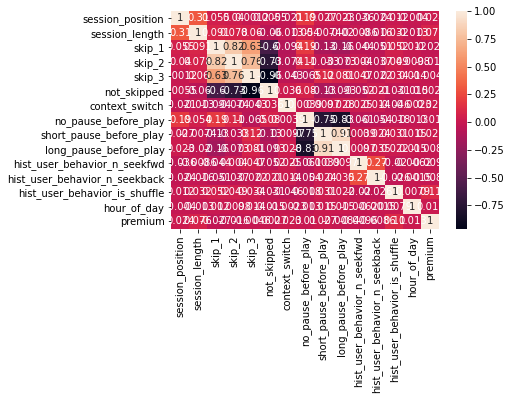

In [198]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

In [199]:
# Pairplot - Visulaize only Two varibles, Varibles- Continuous Catergorical or Booleans

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

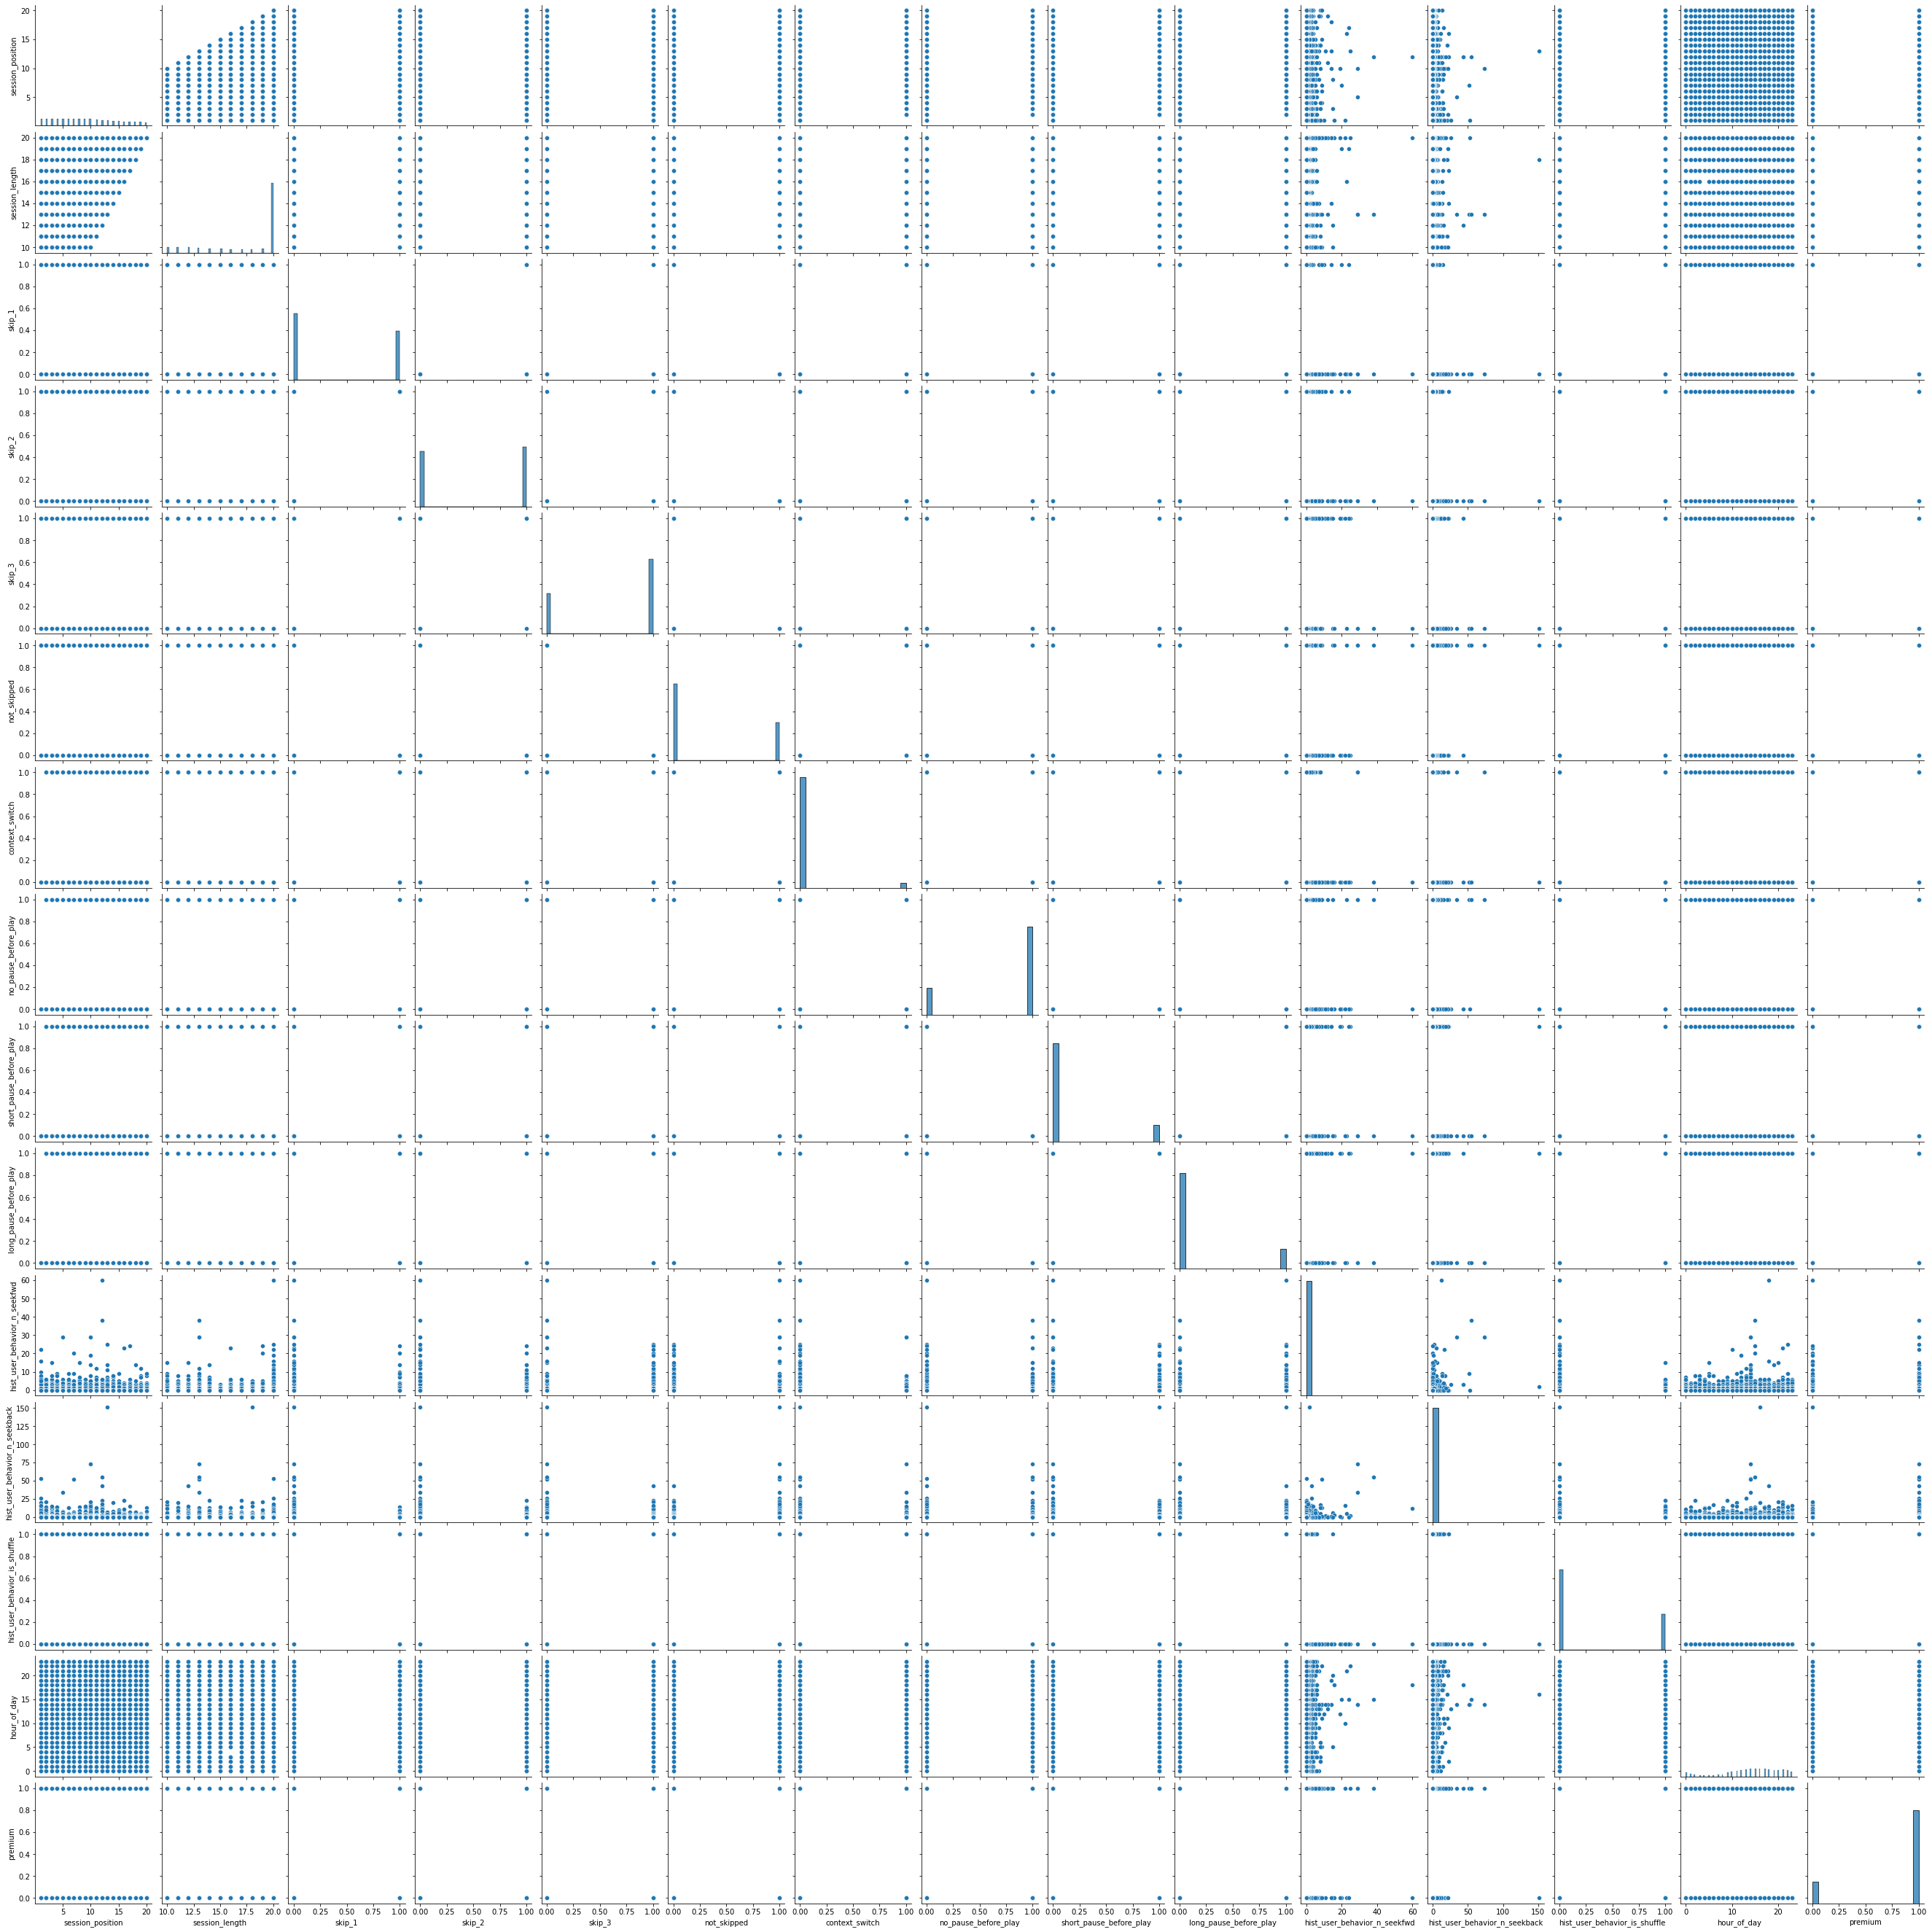

In [200]:
sns.pairplot(df1)

In [201]:
# Scatter Plot - relationship b/w two variables - Pending(need to do)

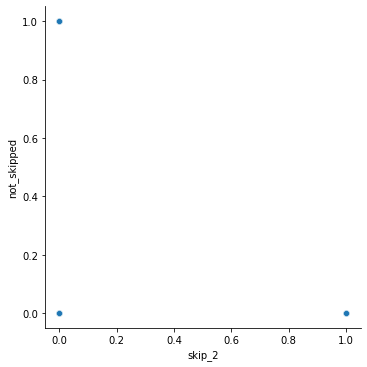

In [202]:
sns.relplot(x = 'skip_2', y = 'not_skipped', data = df1)

In [203]:
# Histogram - groups to ranges so taller bar show more data range fall in that

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='context_switch', ylabel='Density'>

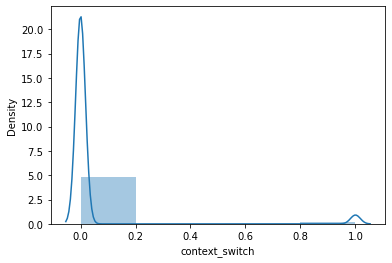

In [204]:
sns.distplot(df1['context_switch'],  bins = 5)

##  Import the Track Dataset

In [205]:
df2 = pd.read_csv('H:/Internship/kaggle/Technocolabs/tf_mini.csv')

In [206]:
df2.head(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


# Merge Dataset

In [207]:
df3 = pd.merge(df1, df2, left_on = 'track_id_clean', right_on = 'track_id')
df3=df3.drop(["track_id_clean"],axis='columns')

In [208]:
df3.head(5)

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,False,False,True,False,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,False,False,False,True,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,False,False,False,True,0,1,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,False,False,True,False,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [209]:
df3.shape

(167880, 50)

In [210]:
len(df2.track_id.unique())

50704

In [211]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   skip_1                           167880 non-null  bool   
 4   skip_2                           167880 non-null  bool   
 5   skip_3                           167880 non-null  bool   
 6   not_skipped                      167880 non-null  bool   
 7   context_switch                   167880 non-null  int64  
 8   no_pause_before_play             167880 non-null  int64  
 9   short_pause_before_play          167880 non-null  int64  
 10  long_pause_before_play           167880 non-null  int64  
 11  hist_user_behavior_n_seekfwd     167880 non-null  int64  
 12  hi

In [212]:
# how many catergories are there in columns
for col in df3.columns:
    print(col, ':', len(df3[col].unique()), 'labels')

session_id : 10000 labels
session_position : 20 labels
session_length : 11 labels
skip_1 : 2 labels
skip_2 : 2 labels
skip_3 : 2 labels
not_skipped : 2 labels
context_switch : 2 labels
no_pause_before_play : 2 labels
short_pause_before_play : 2 labels
long_pause_before_play : 2 labels
hist_user_behavior_n_seekfwd : 25 labels
hist_user_behavior_n_seekback : 30 labels
hist_user_behavior_is_shuffle : 2 labels
hour_of_day : 24 labels
date : 18 labels
premium : 2 labels
context_type : 6 labels
hist_user_behavior_reason_start : 9 labels
hist_user_behavior_reason_end : 7 labels
track_id : 50704 labels
duration : 33549 labels
release_year : 69 labels
us_popularity_estimate : 50704 labels
acousticness : 50673 labels
beat_strength : 50548 labels
bounciness : 50589 labels
danceability : 50580 labels
dyn_range_mean : 50580 labels
energy : 50582 labels
flatness : 49741 labels
instrumentalness : 50698 labels
key : 12 labels
liveness : 50649 labels
loudness : 13522 labels
mechanism : 32603 labels
mod

# Converting Boolean Features into Numbers

In [213]:
df3['mode'] = df3['mode'].replace({
    'major': 1,
    'minor': 0
})
df3['skip_1'] = df3['skip_1'].replace({
    True: 1,
    False: 0
})
df3['skip_2'] = df3['skip_2'].replace({
    True: 1,
    False: 0
})
df3['skip_3'] = df3['skip_3'].replace({
    True: 1,
    False: 0
})
df3['not_skipped'] = df3['not_skipped'].replace({
    True: 1,
    False: 0
})
df3['hist_user_behavior_is_shuffle'] = df3['hist_user_behavior_is_shuffle'].replace({
    True: 1,
    False: 0
})
df3['premium'] = df3['premium'].replace({
    True: 1,
    False: 0
})

In [214]:
df3.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,1,0,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,0,0,1,0,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,0,0,0,1,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,0,0,0,1,0,1,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,0,0,1,0,0,0,1,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [215]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   skip_1                           167880 non-null  int64  
 4   skip_2                           167880 non-null  int64  
 5   skip_3                           167880 non-null  int64  
 6   not_skipped                      167880 non-null  int64  
 7   context_switch                   167880 non-null  int64  
 8   no_pause_before_play             167880 non-null  int64  
 9   short_pause_before_play          167880 non-null  int64  
 10  long_pause_before_play           167880 non-null  int64  
 11  hist_user_behavior_n_seekfwd     167880 non-null  int64  
 12  hi

#  Encoding Categorical Features

In [216]:
df4 = pd.get_dummies(df3, columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'])

In [217]:
df4.head(5)

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [218]:
df4.shape

(167880, 69)

In [219]:
df4.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personal

In [220]:
df4.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,...,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.421503,0.517179,0.648380,0.332881,0.040904,0.767602,0.146635,0.172832,...,0.000810,0.328062,0.000548,0.078205,0.000048,0.088295,0.484805,0.003354,0.001590,0.343704
std,5.457638,3.422025,0.493801,0.499706,0.477478,0.471246,0.198069,0.422363,0.353742,0.378103,...,0.028451,0.469509,0.023403,0.268494,0.006903,0.283725,0.499771,0.057813,0.039848,0.474945
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Outlier

In [221]:
max_threshold = df4['hist_user_behavior_n_seekfwd'].quantile(0.999)
max_threshold

3.0

In [222]:
max_threshold_seekback = df4['hist_user_behavior_n_seekback'].quantile(0.999)
max_threshold_seekback

4.0

In [223]:
min_thresold_loudness = df4['loudness'].quantile(0.001)
min_thresold_loudness

-31.202999114990234

In [224]:
max_thresold_loudness = df4['loudness'].quantile(0.9998)
max_thresold_loudness

0.1749999970197677

In [225]:
df4 = df4[df4['hist_user_behavior_n_seekfwd'] < max_threshold]
df4 = df4[df4['hist_user_behavior_n_seekback'] < max_threshold_seekback]
df4 =  df4[(df4['loudness'] < 0) & (df4['loudness'] > min_thresold_loudness)]

In [226]:
df3.shape

(167880, 50)

In [227]:
df4.shape

(167128, 69)

In [228]:
df4.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,...,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000
mean,9.329460,17.652410,0.422772,0.517735,0.648431,0.332829,0.040622,0.768369,0.146343,0.172377,...,0.000802,0.328592,0.000550,0.078299,0.000048,0.087879,0.485131,0.003327,0.001586,0.343731
std,5.456103,3.421973,0.494001,0.499687,0.477462,0.471227,0.197412,0.421876,0.353451,0.377709,...,0.028304,0.469703,0.023456,0.268643,0.006918,0.283119,0.499780,0.057582,0.039788,0.474954
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Noramlization

In [229]:
df5 = df4.copy()
df5.drop(['session_id','track_id','date','skip_1','skip_3', 'not_skipped'],axis = 'columns', inplace = True)
sc = MinMaxScaler()
scaling_col = df5.columns

In [230]:
for i in scaling_col:
    df5[i] = sc.fit_transform(df4[[i]])

In [231]:
df5.shape

(167128, 63)

In [232]:
df5.describe()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,...,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000
mean,0.438393,0.765241,0.517735,0.040622,0.768369,0.146343,0.172377,0.014318,0.011223,0.309206,...,0.000802,0.328592,0.000550,0.078299,0.000048,0.087879,0.485131,0.003327,0.001586,0.343731
std,0.287163,0.342197,0.499687,0.197412,0.421876,0.353451,0.377709,0.092249,0.069348,0.462168,...,0.028304,0.469703,0.023456,0.268643,0.006918,0.283119,0.499780,0.057582,0.039788,0.474954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210526,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.421053,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684211,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
df5.head()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.263158,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.421053,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.315789,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [240]:
#Corelation Heatmap
corelation = df5.corr()
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

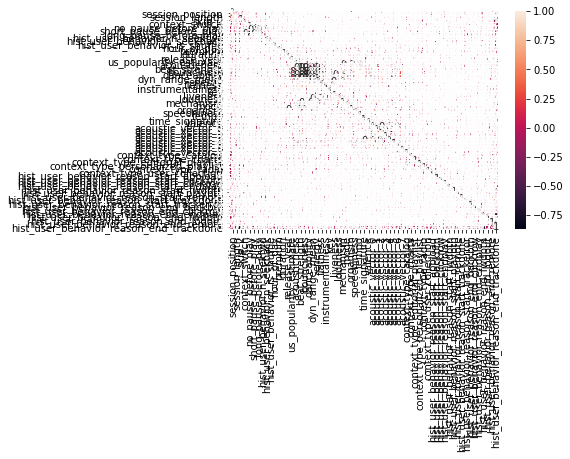

In [244]:
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True)

# PCA (Principal Component Analysis)

In [242]:
df5.keys()

Index(['session_position', 'session_length', 'skip_2', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'mode',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence',
       'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2',
       'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5',
       'acoustic_vector_6', 'acoustic_vector_7', 'context_type_catalog',
       'context_type_charts', 'context_type_editorial_playlist',
       'context_type_personalized_playlist', 'context_type_radio',
       'context_type_user_colle

In [248]:
df6 = df5.copy()

In [249]:
df6.shape

(167128, 63)

In [254]:
df6_x = df6.drop(['skip_2'], axis = 'columns')
df6_y = df6.skip_2

In [255]:
from sklearn.decomposition import PCA

In [257]:
pca = PCA(n_components=35, random_state= 50)
pca.fit(df6_x)

PCA(n_components=35, random_state=50)

In [259]:
x_pca = pca.transform(df6_x)
df6_x.shape,x_pca.shape

((167128, 62), (167128, 35))

In [260]:
variance= pca.explained_variance_ratio_

<BarContainer object of 35 artists>

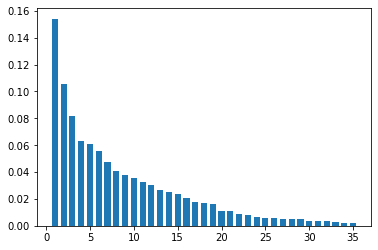

In [261]:
plt.bar(x= range(1, len(variance)+1), height=variance, width=0.7)

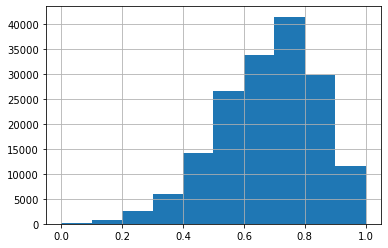

In [262]:
df5.danceability.hist();

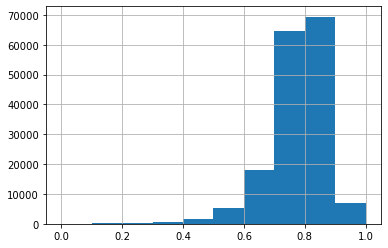

In [263]:
df5.loudness.hist();